what date did you release flies (e.g. 20220804): 20241006
what time did you release flies (e.g. 142040): 101551
    time  wind_direction  math_direction  wind_speed
52  1015       56.923998       -2.566437    0.974148
53  1016       29.955670       -2.093058    0.766233
54  1017       51.510735       -2.383590    0.845879


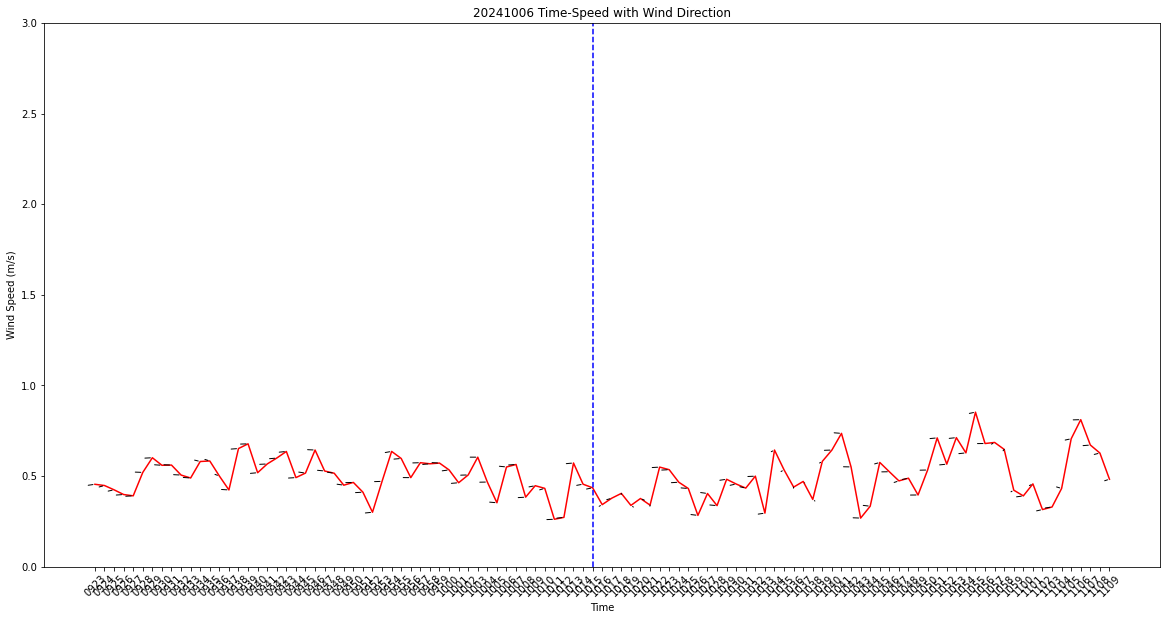

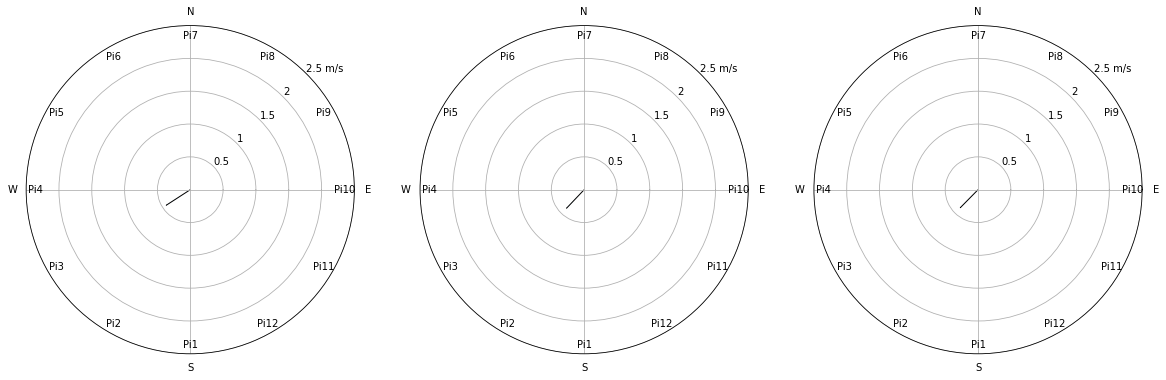

In [1]:
#### 20240828

import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


##### wind speed-time plot with wind direction #####


date=input("what date did you release flies (e.g. 20220804): ")
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
release=input("what time did you release flies (e.g. 142040): ")
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
#data_path='/media/flyranch/data21/field_release/wind_data_files/anemometer_'
data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42

fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True)


ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
#print(dir_lst)
#print(spd_lst)
#print(spd_calc_lst)

fig1=plt.figure(figsize=(20,10))

a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

pi_loc_lst=np.arange(0,360,30)
pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

for i in range(len(release_df)):
    ax1=plt.axes()
    ax1=plt.subplot(a,b,c, polar=True)
    ax1.set_rlim([0,2.5])
    ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
    ax1.set_rlabel_position(45)
    

    thetaticks=np.arange(0,360,90)
    ax1.set_thetagrids(thetaticks,['E','N','W','S'])
    #ax1.set_rticklabels(["",0.5,1,1.5,2,""])
    #wind_d_theta=[dir_lst[i],dir_lst[i]]
    #ax1.plot(wind_d_theta,[0,spd_lst[i]],marker=(3,0,dir_lst[i]),markersize=10,ls='--',color='k')
    #ax1.plot(wind_d_theta,[0,spd_lst[i]],ls='-',color='k')

    #cor_x=np.cos(dir_lst[i])#*spd_lst[i]
    #cor_y=np.sin(dir_lst[i])#*spd_lst[i]
    #print(cor_x)
    #print(cor_y)
    #ax1.set_theta_zero_location('N')
    #ax1.set_theta_direction('clockwise')
    #arr1=plt.arrow(0,0,cor_x,cor_y,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
    #             edgecolor='black',facecolor='black',lw=2,zorder=5)
    arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])#,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
                 #edgecolor='black',facecolor='black',lw=2,zorder=5)
    
    for n in range(len(pi_loc_lst)):
        ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
            ha='center',va='center')
    
    c=c+1

plt.savefig(out_path+date+'_initial_3_mins_wind.pdf',transparent=True)

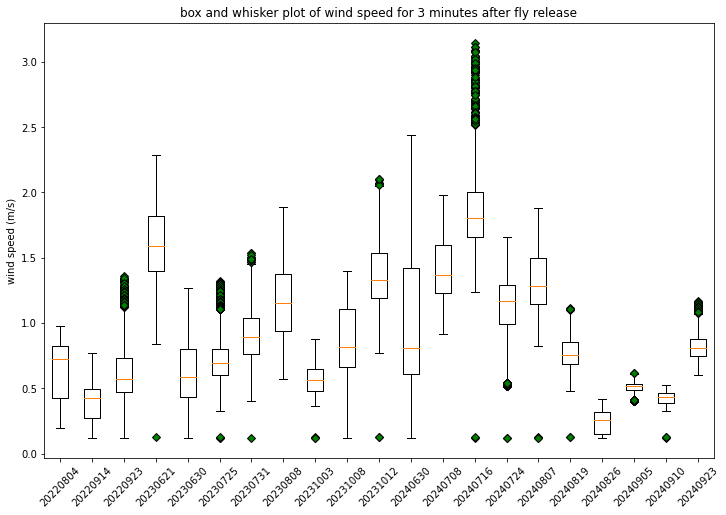

In [2]:
### release time note
### 20220725 093010 
### 20220804 105542 
### 20230914 113540
### 20230923 114246
### 20230621 123200 10 flies
### 20230630 094055 0 flies
### 20230725 113037 2 flies
### 20230731 105622 1 flies
### 20230808 094526 4 flies


import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib
##### box and whisker plot of wind speed for 5 minutes after fly release #####


date_list=["20220804","20220914","20220923","20230621","20230630",
           "20230725","20230731","20230808","20231003","20231008",
           "20231012","20240630","20240708","20240716","20240724",
           "20240807","20240819","20240826","20240905","20240910",
           "20240923","20241006"]#,"20190706","20190611","20190508","20190419"]
release_list=["105542","113540","114246","123200","094055",
              "113037","105622","094526","154610","122251",
              "135550","112239","090049","094420","082053",
              "074202","081047","082421","084649","082316",
              "082010","101551"]#,"081100","074800","100400","115600"]
#date=input("what date did you,release flies (e.g. 20220804): ")
#date="20230731"
#wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
#release=input("what time did you release flies (e.g. 142040): ")
#release="105622"
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"

data_list=[]

for date in date_list:
    wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
    release=release_list[date_list.index(date)]
    #print(release)
    #data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
    data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
    directory=data_path+"anemometer_"+wind_data+".txt"
    wind_df=pd.read_csv(directory,delimiter=' ',header=None)
    wind_df.columns=("time","direction","wind_speed")
    time_list=[]

    for i in wind_df.iloc[:,0]:
        time=datetime.datetime.fromtimestamp(i)
        str_h=str(time.hour)
        str_m=str(time.minute)
        str_s=str(time.second)
        if len(str_h)==1:
            str_h='0'+str_h
        if len(str_m)==1:
            str_m='0'+str_m
        if len(str_s)==1:
            str_s='0'+str_s
        str_time=str_h+str_m+str_s # include seconds
        #str_time=str_h+str_m
        int_time=int(str_h)*3600+int(str_m)*60+int(str_s)
        time_list.append(int_time)

    ### adjust
    wind_df.iloc[:,0]=time_list
    ### focus on 5minutes after release
    release_in_sec=int(release[:2])*3600+int(release[2:4])*60+int(release[4:])
    release_in_sec_plus_3min=release_in_sec+180
    #this_time=int(wind_df['time'][:2])*3600+int(wind_df['time'][2:4])*60+int(wind_df['time'][4:])
    new_wind_df=wind_df.loc[(release_in_sec<=wind_df['time'])&(wind_df['time']<=release_in_sec_plus_3min)]
    #new_wind_df=wind_df.loc[(release<=wind_df['time'])&(wind_df['time']<=str(int(release)+5))]   

    td_list=[]
    #print(new_wind_df.iloc[:,0])
    #for i in new_wind_df.iloc[:,0]:
    #    if int(i)<36000:
    #        td=str(timedelta(seconds=i))[:1]+str(timedelta(seconds=i))[2:4]+str(timedelta(seconds=i))[5:7]
    #    else:
    #        td=str(timedelta(seconds=i))[:2]+str(timedelta(seconds=i))[3:5]+str(timedelta(seconds=i))[6:8]
    #    td_list.append(td)
        
    #new_wind_df.iloc[:,0]=td_list
    spd_list=new_wind_df['wind_speed']*.44704 # convert mph to m/s

    matplotlib.rcParams['pdf.fonttype'] = 42
    green_diamond = dict(markerfacecolor='g', marker='D')
    data=spd_list
    data_list.append(data)

fig,ax=plt.subplots(figsize=(12,8))
#ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release \n the last 4 from Kate Leitch's data")
ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release")
ax.boxplot(data_list, flierprops=green_diamond)
ax.set_xticklabels(date_list,rotation=45)
ax.set_ylabel("wind speed (m/s)")

out_path=data_path+"wind_data_plots/boxplot_for_wind_data.pdf"

#plt.savefig('/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/wind_data_plots/boxplot_for_wind_data.pdf')
plt.savefig(out_path)

In [ ]:
###for first arrival flies histogram from fly release exp
###20231008 50m data removed

import json
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0}) ### to avoid "max open warning"
matplotlib.rcParams['pdf.fonttype'] = 42

with open("/home/flyranch/field_data_and_analysis_scripts/2021lab/refs_for_presentation/first_arrival.json", "r") as read_file:
    data=json.load(read_file)

upwind_sec_list=[]
downwind_sec_list=[]

date_list=['20231003','20220923','20220914','20220804']
#20231008 D.suzukii 50m
#20231003 D.suzukii 25m
#20220923 D.suzukii 20m
#20220914 D.suzukii 20m
#20220804 D.melanogaster 20m
wind_list=['uu','u','d','dd']


for date in date_list:
    for i in wind_list:
        if (i=='uu')or(i=='u'):
            upwind_sec_list.append(data[date][i])
        else:
            downwind_sec_list.append(data[date][i])

flat_upwind_list=[e for innerList in upwind_sec_list for e in innerList]
flat_downwind_list=[e for innerList in downwind_sec_list for e in innerList]

plt.hist(flat_upwind_list,label='upwind')
plt.hist(flat_downwind_list,alpha=0.5,label='downwind')
plt.legend(loc='upper right')
plt.xlabel("first arrival in sec")


In [ ]:
###for first arrival flies histogram from fly release exp

import json
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0}) ### to avoid "max open warning"
matplotlib.rcParams['pdf.fonttype'] = 42

with open("/home/flyranch/field_data_and_analysis_scripts/2021lab/refs_for_presentation/first_arrival.json", "r") as read_file:
    data=json.load(read_file)

upwind_sec_list=[]
downwind_sec_list=[]

date_list=['20231008','20231003','20220923','20220914','20220804']
#20231008 D.suzukii 50m
#20231003 D.suzukii 25m
#20220923 D.suzukii 20m
#20220914 D.suzukii 20m
#20220804 D.melanogaster 20m
wind_list=['uu','u','d','dd']


for date in date_list:
    for i in wind_list:
        if (i=='uu')or(i=='u'):
            upwind_sec_list.append(data[date][i])
        else:
            downwind_sec_list.append(data[date][i])

flat_upwind_list=[e for innerList in upwind_sec_list for e in innerList]
flat_downwind_list=[e for innerList in downwind_sec_list for e in innerList]

plt.hist(flat_upwind_list,label='upwind')
plt.hist(flat_downwind_list,alpha=0.5,label='downwind')
plt.legend(loc='upper right')
plt.xlabel("first arrival in sec")


In [ ]:
###for first arrival flies from fly release exp

import json
 
# Data to be written
first_arrival_dict={"20231008":
        {"uu":[81,103],
        "u":[26,156],
        "d":[63,72],
        "dd":[42,90]},
    "20231003":
         {"uu":[21,74],
        "u":[61,90],
        "d":[51,77],
        "dd":[18,40]},
    "20220923":
         {"uu":[44,88],
        "u":[62,78],
        "d":[62,66],
        "dd":[44,56]},
    "20220914":
         {"uu":[42,52],
        "u":[54,164],
        "d":[72,109],
        "dd":[40,76]},
    "20220804":
         {"uu":[32,116],
        "u":[36,48],
        "d":[48,78],
        "dd":[22,42]}}
 

first_arrival_json=json.dumps(first_arrival_dict,indent=4)
 
with open("/home/flyranch/field_data_and_analysis_scripts/2021lab/refs_for_presentation/first_arrival.json","w") as outfile:
    outfile.write(first_arrival_json)


first_arrival_dict

In [ ]:
### for male_female analysis, use 20231012, 20231008, 20220914 data 

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0}) ### to avoid "max open warning"
matplotlib.rcParams['pdf.fonttype'] = 42
import json
import seaborn as sns

with open("/home/flyranch/field_data_and_analysis_scripts/2021lab/refs_for_presentation/flies_collected.json", "r") as read_file:
    data=json.load(read_file)
    

date_list=["20231012","20231008","20220914"]    
male_list=[]
female_list=[]


for i in data.keys():
    for j in date_list:
        if i==j:
            male_list.append(list(data[i].values())[5]['male'])
            male_list.append(list(data[i].values())[6]['male'])
            male_list.append(list(data[i].values())[7]['male'])
            male_list.append(list(data[i].values())[8]['male'])
            male_list.append(list(data[i].values())[9]['male'])
            male_list.append(list(data[i].values())[10]['male'])
            male_list.append(list(data[i].values())[11]['male'])
            male_list.append(list(data[i].values())[12]['male'])
            female_list.append(list(data[i].values())[5]['female'])
            female_list.append(list(data[i].values())[6]['female'])
            female_list.append(list(data[i].values())[7]['female'])
            female_list.append(list(data[i].values())[8]['female'])
            female_list.append(list(data[i].values())[9]['female'])
            female_list.append(list(data[i].values())[10]['female'])
            female_list.append(list(data[i].values())[11]['female'])
            female_list.append(list(data[i].values())[12]['female'])
            
            
            
#list(list(data.values())[4].values())[5]["male"]

#list(data.values())[2]

#data.keys()

#male_len_list=[0]*len(male_list)
#female_len_list=[1]*len(female_list)


mean_male=np.mean(male_list)
mean_female=np.mean(female_list)

fig2=plt.figure()
#plt.bar(['mean_male','mean_female'],[mean_male,mean_female])
#plt.xlabel('number of flies collected each trap')
#plt.plot(male_len_list,male_list,'o',color='r')
#plt.plot(female_len_list,female_list,'o',color='r')



tst_dic={'mean_male':male_list,'mean_female':female_list}

sns.set(style="whitegrid")
sns.barplot(data=tst_dic)
sns.swarmplot(data=tst_dic, color="0", alpha=.35)
plt.ylabel('number of flies collected each trap')

In [ ]:
### for starvation analysis, use 20231012,20231008,20230808,20230731,20230725,20230630,20230621,20220914 data 

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0}) ### to avoid "max open warning"
matplotlib.rcParams['pdf.fonttype'] = 42
import json
import seaborn as sns

with open("/home/flyranch/field_data_and_analysis_scripts/2021lab/refs_for_presentation/flies_collected.json", "r") as read_file:
    data=json.load(read_file)
    

date_list=["20231012","20231008","20230808","20230731","20230725","20230630","20230621","20220914"]    
starve_list=[]
no_starve_list=[]


for i in data.keys():
    for j in date_list:
        if i==j:
            if list(list(data[i].values()))[2]=="Y":
                starve_list.append(list(data[i].values())[5]['total'])
                starve_list.append(list(data[i].values())[6]['total'])
                starve_list.append(list(data[i].values())[7]['total'])
                starve_list.append(list(data[i].values())[8]['total'])
                starve_list.append(list(data[i].values())[9]['total'])
                starve_list.append(list(data[i].values())[10]['total'])
                starve_list.append(list(data[i].values())[11]['total'])
                starve_list.append(list(data[i].values())[12]['total'])
            else:
                no_starve_list.append(list(data[i].values())[5]['total'])
                no_starve_list.append(list(data[i].values())[6]['total'])
                no_starve_list.append(list(data[i].values())[7]['total'])
                no_starve_list.append(list(data[i].values())[8]['total'])
                no_starve_list.append(list(data[i].values())[9]['total'])
                no_starve_list.append(list(data[i].values())[10]['total'])
                no_starve_list.append(list(data[i].values())[11]['total'])
                no_starve_list.append(list(data[i].values())[12]['total'])

print(len(starve_list))

mean_starve=np.mean(starve_list)
mean_no_starve=np.mean(no_starve_list)

fig2=plt.figure()
#plt.bar(['mean_male','mean_female'],[mean_male,mean_female])
#plt.xlabel('number of flies collected each trap')
#plt.plot(male_len_list,male_list,'o',color='r')
#plt.plot(female_len_list,female_list,'o',color='r')



stv_dic={'mean_starve':starve_list,'mean_no_starve':no_starve_list}

sns.set(style="whitegrid")
sns.barplot(data=stv_dic)
sns.swarmplot(data=stv_dic, color="0", alpha=.35)
plt.ylabel('number of flies collected each trap')

In [ ]:
### 2023/10/12 (S) D.suzukii M:52 F:49 =>101 50m 
### 2023/10/08 (S) D.suzukii M:96 F:82 =>178 25m upwind:110 downwind:68
### 2023/08/08     D.suzukii M:1  F:3  =>4   20m
### 2023/07/31     D.suzukii M:0  F:1  =>1   20m
### 2023/07/25     D.suzukii M:0  F:2  =>2   40m
### 2023/06/30     D.suzukii M:0  F:0  =>0   50m
### 2023/06/21     D.suzukii M:7  F:3  =>10  50m
### 2022/09/14     D.suzukii M:4  F:29 =>33  20m  upwind:13 downwind:20

### for analysis, use 20231012, 20231008, 20220914 data 


import matplotlib.pyplot as plt

mean_starve=(101+178)/2
mean_no_starve=(4+1+2+0+10+33)/6

#fig1=plt.figure()
#plt.bar(['mean_starve','mean_no_starve'],[mean_starve,mean_no_starve])
#plt.ylabel("number of flies collected")



mean_male_collected=(52+96+4)/3
mean_female_collected=(49+82+29)/3


#fig2=plt.figure()
#plt.bar(['mean_male','mean_female'],[mean_male_collected,mean_female_collected])



In [ ]:
###for number of flies collected from fly release exp

import json
 
# Data to be written
flies_collected_dict={"20231012":
        {"species":"D.suzukii",
        "distance":"50m",
        "starvation":"Y",
        "release time":"13:55:50.44",
        "number of traps":8,
         "trap1":
         {"male":1,
          "female":5,
          "total":6},
         "trap2":
         {"male":2,
          "female":4,
          "total":6},
         "trap3":
         {"male":1,
          "female":2,
          "total":3},
         "trap4":
         {"male":7,
          "female":7,
          "total":14},
         "trap5":
         {"male":29,
          "female":15,
          "total":44},
         "trap6":
         {"male":9,
          "female":9,
          "total":18},
         "trap7":
         {"male":0,
          "female":3,
          "total":3},
         "trap8":
         {"male":3,
          "female":4,
          "total":7}},
                      
        "20231008":
        {"species":"D.suzukii",
        "distance":"25m",
        "starvation":"Y",
        "release time":"12:22:51.41",
        "number of traps":8,
         "trap1":
         {"male":11,
          "female":10,
          "total":21},
         "trap2":
         {"male":5,
          "female":13,
          "total":18},
         "trap3":
         {"male":14,
          "female":19,
          "total":33},
         "trap4":
         {"male":22,
          "female":9,
          "total":31},
         "trap5":
         {"male":15,
          "female":15,
          "total":30},
         "trap6":
         {"male":8,
          "female":8,
          "total":16},
         "trap7":
         {"male":8,
          "female":5,
          "total":13},
         "trap8":
         {"male":13,
          "female":3,
          "total":16}},

        "20231003":
        {"species":"D.melanogaster",
        "distance":"25m",
        "starvation":"Y",
        "release time":"15:46:10.10",
        "number of traps":8,
         "trap1":
         {"male":"",
          "female":"",
          "total":""},
         "trap2":
         {"male":"",
          "female":"",
          "total":""},
         "trap3":
         {"male":"",
          "female":"",
          "total":""},
         "trap4":
         {"male":"",
          "female":"",
          "total":""},
         "trap5":
         {"male":"",
          "female":"",
          "total":""},
         "trap6":
         {"male":"",
          "female":"",
          "total":""},
         "trap7":
         {"male":"",
          "female":"",
          "total":""},
         "trap8":
         {"male":"",
          "female":"",
          "total":""}},
                      
        "20230808":
        {"species":"D.suzukii",
        "distance":"20m",
        "starvation":"N",
        "release time":"09:45:26.7",
        "number of traps":8,
         "trap1":
         {"male":0,
          "female":2,
          "total":2},
         "trap2":
         {"male":0,
          "female":0,
          "total":0},
         "trap3":
         {"male":0,
          "female":0,
          "total":0},
         "trap4":
         {"male":0,
          "female":0,
          "total":0},
         "trap5":
         {"male":1,
          "female":1,
          "total":2},
         "trap6":
         {"male":0,
          "female":0,
          "total":0},
         "trap7":
         {"male":0,
          "female":0,
          "total":0},
         "trap8":
         {"male":0,
          "female":0,
          "total":0}},
                                            
        "20230731":
        {"species":"D.suzukii",
        "distance":"20m",
        "starvation":"N",
        "release time":"10:56:22.0",
        "number of traps":8,
         "trap1":
         {"male":0,
          "female":0,
          "total":0},
         "trap2":
         {"male":0,
          "female":0,
          "total":0},
         "trap3":
         {"male":0,
          "female":0,
          "total":0},
         "trap4":
         {"male":0,
          "female":0,
          "total":0},
         "trap5":
         {"male":0,
          "female":0,
          "total":0},
         "trap6":
         {"male":0,
          "female":1,
          "total":1},
         "trap7":
         {"male":0,
          "female":0,
          "total":0},
         "trap8":
         {"male":0,
          "female":0,
          "total":0}},
                      
        "20230725":
        {"species":"D.suzukii",
        "distance":"40m",
        "starvation":"N",
        "release time":"11:30:37.7",
        "number of traps":8,
         "trap1":
         {"male":0,
          "female":0,
          "total":0},
         "trap2":
         {"male":0,
          "female":1,
          "total":1},
         "trap3":
         {"male":0,
          "female":0,
          "total":0},
         "trap4":
         {"male":0,
          "female":0,
          "total":0},
         "trap5":
         {"male":0,
          "female":0,
          "total":0},
         "trap6":
         {"male":0,
          "female":1,
          "total":1},
         "trap7":
         {"male":0,
          "female":0,
          "total":0},
         "trap8":
         {"male":0,
          "female":0,
          "total":0}},
                      
        "20230630":
        {"species":"D.suzukii",
        "distance":"50m",
        "starvation":"N",
        "release time":"09:40:55.67",
        "number of traps":8,
         "trap1":
         {"male":0,
          "female":0,
          "total":0},
         "trap2":
         {"male":0,
          "female":0,
          "total":0},
         "trap3":
         {"male":0,
          "female":0,
          "total":0},
         "trap4":
         {"male":0,
          "female":0,
          "total":0},
         "trap5":
         {"male":0,
          "female":0,
          "total":0},
         "trap6":
         {"male":0,
          "female":0,
          "total":0},
         "trap7":
         {"male":0,
          "female":0,
          "total":0},
         "trap8":
         {"male":0,
          "female":0,
          "total":0}},
                      
        "20230621":
        {"species":"D.suzukii",
        "distance":"50m",
        "starvation":"N",
        "release time":"12:32:00.0",
        "number of traps":8,
         "trap1":
         {"male":2,
          "female":0,
          "total":2},
         "trap2":
         {"male":2,
          "female":2,
          "total":4},
         "trap3":
         {"male":1,
          "female":0,
          "total":1},
         "trap4":
         {"male":0,
          "female":0,
          "total":0},
         "trap5":
         {"male":1,
          "female":0,
          "total":1},
         "trap6":
         {"male":0,
          "female":0,
          "total":0},
         "trap7":
         {"male":1,
          "female":0,
          "total":1},
         "trap8":
         {"male":0,
          "female":1,
          "total":1}},
                      
        "20220923":
        {"species":"D.suzukii",
        "distance":"20m",
        "starvation":"N",
        "release time":"11:42:46.0",
        "number of traps":8,
         "trap1":
         {"male":"",
          "female":"",
          "total":""},
         "trap2":
         {"male":"",
          "female":"",
          "total":""},
         "trap3":
         {"male":"",
          "female":"",
          "total":""},
         "trap4":
         {"male":"",
          "female":"",
          "total":""},
         "trap5":
         {"male":"",
          "female":"",
          "total":""},
         "trap6":
         {"male":"",
          "female":"",
          "total":""},
         "trap7":
         {"male":"",
          "female":"",
          "total":""},
         "trap8":
         {"male":"",
          "female":"",
          "total":""}},
                      
        "20220914":
        {"species":"D.suzukii",
        "distance":"20m",
        "starvation":"N",
        "release time":"11:35:40.0",
        "number of traps":8,
         "trap1":
         {"male":0,
          "female":1,
          "total":1},
         "trap2":
         {"male":0,
          "female":6,
          "total":6},
         "trap3":
         {"male":0,
          "female":1,
          "total":1},
         "trap4":
         {"male":0,
          "female":4,
          "total":4},
         "trap5":
         {"male":0,
          "female":1,
          "total":1},
         "trap6":
         {"male":1,
          "female":4,
          "total":5},
         "trap7":
         {"male":1,
          "female":1,
          "total":2},
         "trap8":
         {"male":0,
          "female":11,
          "total":11}},
                      
        "20220914":
        {"species":"D.melanogaster",
        "distance":"20m",
        "starvation":"N",
        "release time":"11:55:42.0",
        "number of traps":8,
         "trap1":
         {"male":10,
          "female":11,
          "total":21},
         "trap2":
         {"male":10,
          "female":10,
          "total":20},
         "trap3":
         {"male":0,
          "female":2,
          "total":2},
         "trap4":
         {"male":8,
          "female":7,
          "total":15},
         "trap5":
         {"male":3,
          "female":2,
          "total":5},
         "trap6":
         {"male":13,
          "female":30,
          "total":43},
         "trap7":
         {"male":8,
          "female":24,
          "total":32},
         "trap8":
         {"male":14,
          "female":33,
          "total":47}}}
                      
flies_collected_json=json.dumps(flies_collected_dict,indent=4)
 
with open("/home/flyranch/field_data_and_analysis_scripts/2021lab/refs_for_presentation/flies_collected.json","w") as outfile:
    outfile.write(flies_collected_json)

In [ ]:
ffmpeg -start_number 1461 -i /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/tl_0000_%04d.jpg -c:v libx264 -pix_fmt yuv420p -r 5 /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/output_3.mp4
    
    
    

In [ ]:
import os
import glob
import pdb


date=input("Enter what date did you do this experiment (e.g. 20220317 (yyyymmdd)): ")

path='/home/flyranch/field_data_and_analysis_scripts/2021lab/'
src_path=path+'short_videos/'+date+'/'

for it in os.scandir(src_path):
    print(it)
    if it.is_dir():
        ### rename image files
        data_path=os.path.join(it,'*jpg')
        filelist=glob.glob(data_path)
        sorted_files=sorted(filelist)

#        count=1
        for file in sorted_files:
            os.rename(file,file[:-20]+'.jpg')
            print(file[:-20]+'.jpg')
#            print(file)
#    		if count<10:
#    			c="000"+str(count)
#    		elif 10<=count<100:
#    			c="00"+str(count)
#    		elif 100<=count<1000:
#    			c="0"+str(count)
#    		else:
#    			c=str(count)
#    		pre="tl_0000_"+c+"_"
#    		mid=date+"_"
#    		dis=len(it.path)
#    		time=file[dis+14:dis+20] #for 20220804 exp
#    		ext=".jpg"
#    		filename=pre+mid+time+ext
#    		dst=it.path+"/"+filename
#    		os.rename(file,dst)
#        count=count+1


#    	### rename subdirectory
#    	src_dir=it.path+'/'
#    	dst_dir=it.path[:-18]+'trap_'+it.path[-18:]+'/'
#    	os.rename(src_dir,dst_dir)


In [ ]:
num1=7
num2=6

trap_num_list=[1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8]
upwind1=[]
upwind2=[]
downwind2=[]
downwind1=[]
for ind,ele in enumerate(trap_num_list):
    if (4<=ind<len(trap_num_list)-4) and ele==num1:
        upwind1.append((ele,trap_num_list[ind+1]))
        upwind2.append((trap_num_list[ind-1],trap_num_list[ind+2]))    
        downwind2.append((trap_num_list[ind-2],trap_num_list[ind+3]))
        downwind1.append((trap_num_list[ind-3],trap_num_list[ind+4]))

wind_dict={'r':upwind1,'m':upwind2,'b':downwind2,'c':downwind1}
        
print(upwind1)
print(upwind2)
print(downwind2)
print(downwind1)
print(wind_dict)


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys





# to name output file
ind=0

fig=plt.figure()
ax=plt.axes()
#fig,ax=plt.subplots()

# to set range xlim, ylim
plt.xlim(-60,500)
plt.ylim(-0.5,16)

#x=np.linspace(-60,500)
#y=np.linspace(-0.5,16)

# set labels
plt.xlabel('Time (sec)')
plt.ylabel('Flies at Trap')

#ax.set_xlabel('time since release (sec)')
#ax.set_ylabel('flies at trap')

#set dark back ground
#plt.style.use('dark_background')
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')

# set thick param and label color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# hide spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white') 


#in advance, plot data till 360 sec
plt.plot(sec_since_release_list[:55], on_trap_list[:55], '-',markersize=6,color="r",label="on trap")
plt.savefig(+str(0)+'.svg')
#pdb.set_trace()

# 360 sec to 760 sec
for i in range(len(sec_since_release_list[:282])):
	plt.plot(sec_since_release_list[55:i], on_trap_list[55:i], '-',markersize=6,color="r",label="on trap")
	plt.savefig(+str(ind)+'.svg')
	ind+=1


plt.savefig(+str(ind)+'.svg',dpi=600)

In [ ]:
## from math import radians
import matplotlib.pyplot as plt
import numpy as np
import pdb
import time
import datetime
import sys
import json

#2 traps
trap_I='2021_10_30_I'
trap_J='2021_10_30_J'

f_I=open('/home/flyranch/field_data_and_analysis_scripts/2021lab/all_traps_final_analysis_json_files/trap_'+trap_I+'/master_trap_'+trap_I+'.json')
data_I=json.load(f_I)
f_J=open('/home/flyranch/field_data_and_analysis_scripts/2021lab/all_traps_final_analysis_json_files/trap_'+trap_J+'/master_trap_'+trap_J+'.json')
data_J=json.load(f_J)

release='142000'
released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#create lists
on_trap_list_I=[]
in_trap_list_I=[]
sec_since_release_list_I=[]
actual_timestamp_list_I=[]

on_trap_list_J=[]
in_trap_list_J=[]
sec_since_release_list_J=[]
actual_timestamp_list_J=[]

for i in data_I['trap_'+trap_I]:
	for k in data_I['trap_'+trap_I][i]:
		if i=="flies on trap over time:":
			on_trap_list_I.append(k)
		elif i=="flies in trap over time:":
			in_trap_list_I.append(k)
		elif i=="actual timestamp:":
			if len(str(int(k)))==5:
				str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
				actual_timestamp_list_I.append(str_time)
			elif len(str(int(k)))==6:
				str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
				actual_timestamp_list_I.append(str_time)

for i in data_J['trap_'+trap_J]:
	for k in data_J['trap_'+trap_J][i]:
		if i=="flies on trap over time:":
			on_trap_list_J.append(k)
		elif i=="flies in trap over time:":
			in_trap_list_J.append(k)                
		elif i=="actual timestamp:":
			if len(str(int(k)))==5:
				str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
				actual_timestamp_list_J.append(str_time)
			elif len(str(int(k)))==6:
				str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
				actual_timestamp_list_J.append(str_time)
                        
f_I.close()
f_J.close()

def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

for i in actual_timestamp_list_I:
	s=calc_sec_since_release(released_time,i)
	sec_since_release_list_I.append(s)

for i in actual_timestamp_list_J:
	s=calc_sec_since_release(released_time,i)
	sec_since_release_list_J.append(s)


def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list

on_trap_acc_list=make_accumulation_list(on_trap_list_I)
in_trap_acc_list=make_accumulation_list(in_trap_list_I)


fig2=plt.figure(figsize=(15,10))
ax2=plt.axes()
sec_since_release_list_I_20min=[]
on_trap_list_I_20min=[]
sec_since_release_list_J_20min=[]
on_trap_list_J_20min=[]

for i in sec_since_release_list_I:
    if 0<=i<1201:
#        print(on_trap_list_I[sec_since_release_list_I.index(i)])
        x=i
        y=on_trap_list_I[sec_since_release_list_I.index(i)]
        sec_since_release_list_I_20min.append(x)
        on_trap_list_I_20min.append(y)
for i in sec_since_release_list_J:
    if 0<=i<1201:
#        print(on_trap_list_J[sec_since_release_list_J.index(i)])
        x=i
        y=on_trap_list_J[sec_since_release_list_J.index(i)]
        sec_since_release_list_J_20min.append(x)
        on_trap_list_J_20min.append(y)
ax2.plot(sec_since_release_list_I_20min,on_trap_list_I_20min,markersize=6,color="r",label="on trap I (upwind)")
ax2.plot(sec_since_release_list_J_20min,on_trap_list_J_20min,markersize=6,color="b",label="on trap J (downwind)")
ax2.legend()
ax2.set_xlabel('time(sec)')
ax2.set_ylabel('number of flies on trap')